In [1]:
import json
import urllib.request
import pandas as pd
import numpy as np

In [2]:
#creating a vector containing the columns names of a DataFrame
names = ['ratingMPAA', 'budgetData', 'ratingData', 
         'is3D', 'posterURL', 'webURL', 'filmLength', 
         'ratingAgeLimits', 'videoURL', 'genre', 'nameEN', 'hasSeance', 'isHasSimilarFilms', 
         'filmID', 'reviewsCount', 'country', 'isIMAX', 'isHasSequelsAndPrequelsFilms', 'rentData', 
         ]
print(names)

['ratingMPAA', 'budgetData', 'ratingData', 'is3D', 'posterURL', 'webURL', 'filmLength', 'ratingAgeLimits', 'videoURL', 'genre', 'nameEN', 'hasSeance', 'isHasSimilarFilms', 'filmID', 'reviewsCount', 'country', 'isIMAX', 'isHasSequelsAndPrequelsFilms', 'rentData']


In [3]:
#Write a function to get the data about the Film by ID
def getFilm(id):
    """
    Input: kinopoisk ID of the Movie
    Output: JSON object
    """
    URL = 'http://api.kinopoisk.cf/getFilm?filmID=%s'%id
    result = urllib.request.urlopen(URL)
    encoding = 'utf-8'
    json_text = result.read().decode(encoding)
    if json_text == 'null':
        return None
    else:
        return json.loads(json_text)

In [4]:
#Write a function that creates a DataFrame based on JSON object
def totalDataSet(json_file, filmId):
    """
    Input: JSON file containing an information about the Film, kinopoisk ID of the Movie
    Output: Pandas DataFrame    
    """
    totalFrame = pd.DataFrame(index=[filmId], columns=['FilmID'], data=[filmId])
    for name in names:
        if name not in json_file.keys():
            if name in ['budgetData', 'ratingData', 'rentData']:
                data = pd.DataFrame(["NaN"], index=[filmId])
                totalFrame = pd.concat([totalFrame, data], axis=1)
            else:
                data = pd.DataFrame(["NaN"], index=[filmId], columns=[name])
                totalFrame = pd.concat([totalFrame, data], axis=1)
        elif name in ['budgetData', 'ratingData', 'rentData', ]:
            data = pd.DataFrame(json_file[name], index=[filmId])
            totalFrame = pd.concat([totalFrame, data], axis=1)
        else:
            data = pd.DataFrame(json_file[name], index=[filmId], columns=[name])
            totalFrame = pd.concat([totalFrame, data], axis=1)
    return totalFrame

In [62]:
def getFilmsbyRange(startId):
    """
    Getting data for the films with ID between [startId, endId) and returning a tuple (df, filename)
    Input: startId, endId
    Output: file containing the dataframe
    """
    endId = startId + 1000
    filename = "moviesID%s_%s.pkl"%(startId, endId)
    frame_to_save = pd.DataFrame(index=[0], columns=['FilmID'], data=[None])
    for i in range(startId, endId):
        json_film = getFilm(i)
        #print(json_film)
        if json_film is None:
            break
        df_film = totalDataSet(json_film, i)
        if df_film is not None:
            if 0 in df_film.columns:
                df_film = df_film.drop(0, 1)
            df_film.drop_duplicates(keep=False)
        frame_to_save = frame_to_save.append(df_film)
    print(frame_to_save)
    return (frame_to_save, filename)

In [49]:
def saveDFToFile(data):
    """
    Input: tuple (df, filename), where df is a dataframe
    Output: file containing the df
    """
    filename = data[1]
    dataframe = data[0]
    import pickle
    file = open(filename, 'wb')
    pickle.dump(dataframe, file)
    file.close()
    print("Everything is fine. Data is saved.")

In [50]:
def getResfromPickle(filename):
    """
    Simply opens a file and loads a dataframe from it
    Input: filename
    Output: dataframe
    """
    import pickle
    file = open(filename, 'rb')
    resultDF = pickle.load(file)
    file.close()
    return resultDF

In [25]:
#example usage. Getting films from 1000 to 2000
filmData = getFilmsbyRange(1000, 2000)

NameError: name 'get1000films' is not defined

In [9]:
#saving data
#saveDFToFile(filmData)

In [10]:
#loading data from a file
#getResfromPickle("./moviesID1100_1150.pkl").head()

# Using multiprocessing

In [97]:
#from multiprocessing import Pool
#from multiprocessing.dummy import Pool as ThreadPool

#pool = ThreadPool(8)

In [96]:
#a = [1000*i for i in range(700,900)]
#a

In [130]:
#%%time
#data = pool.map(getFilmsbyRange, [0, 1000])

In [131]:
#for i in data:
#    saveDFToFile(i)

In [132]:
#getResfromPickle("./moviesID439000_440000.pkl").head()

# Creating a final dataframe

In [99]:
import os

In [101]:
files = os.listdir("./data/")

In [133]:
#os.chdir("./data/")
#total_frame = pd.DataFrame(index=[0], columns=['FilmID'], data=[None])
#for file in files:
#    total_frame = total_frame.append(getResfromPickle(file))

# Preprocessing data

In [134]:
#deleting unnecesary data
df = total_frame[total_frame.index != 0]

In [157]:
#getting unique distributors
distributors = pd.unique(df['Distributors'].values)
distributors

array([nan, 'Lizard Cinema', 'Каскад', 'Пирамида', 'West',
       'Централ Партнершип', 'Фокс/Гемини', 'Кармен Фильм',
       'Кино без границ', 'Люксор', 'Интерсинема-Арт', 'Пан Терра',
       'Вольга', 'Каро-Премьер', 'Алхимия-Фильм', 'Панорама',
       'Utopia Pictures', 'WDSSPR', 'BVSPR Sony', 'Никола-фильм',
       'Алмазфильм', 'Гельварс', 'Русский Репортаж', 'Парадиз',
       'Гемини Киномир', 'ЛеопАрт', 'Премиум Фильм',
       'Видеоимпульс, Старлет-Медиа', 'Наше Кино', 'UPI', 'АКМ',
       'Двадцатый Век Фокс СНГ', 'Top Film Distribution', 'UIP',
       'Двадцатый Век Фокс СНГ, A Company', 'Reanimedia', 'Kazak Film',
       'Project Manometr', 'Russian World Vision', 'Ракета Релизинг',
       'All Media', 'Cinema Prestige', 'Централ Партнершип Classic',
       'Свой почерк', 'DreamTeam',
       'Двадцатый Век Фокс СНГ, Bazelevs Distribution',
       'Bazelevs Distribution', '25th Floor Film', 'Артхаус',
       'CoolConnections', 'Каропрокат'], dtype=object)

In [164]:
pd.unique(df['country'].values)

array(['Япония', 'Китай', 'Индия', ..., 'Греция, Германия (ФРГ)',
       'Канада, Германия (ФРГ), Франция', 'Югославия, Германия (ФРГ)'], dtype=object)

In [190]:
filmsRussia = df[df['country'] == 'Россия']

In [202]:
df = df[df['budget'].notnull()]

In [205]:
#df['budget']

In [207]:
def fromStrToNum(string):
    return int(string.replace(" ", ""))

In [ ]:
for raw in df['budget'].values:
    df['budget_edited'] = 

In [170]:
rusFilmsBudget = filmsRussia['budget'].dropna()

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
ruFilmBudget = []
for film in rusFilmsBudget:
    ruFilmBudget.append(int(film.replace(" ", "")))

(array([ 7.,  3.,  4.,  4.,  1.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2.00000000e+01,   7.50019667e+05,   1.50001933e+06,
          2.25001900e+06,   3.00001867e+06,   3.75001833e+06,
          4.50001800e+06,   5.25001767e+06,   6.00001733e+06,
          6.75001700e+06,   7.50001667e+06,   8.25001633e+06,
          9.00001600e+06,   9.75001567e+06,   1.05000153e+07,
          1.12500150e+07,   1.20000147e+07,   1.27500143e+07,
          1.35000140e+07,   1.42500137e+07,   1.50000133e+07,
          1.57500130e+07,   1.65000127e+07,   1.72500123e+07,
          1.80000120e+07,   1.87500117e+07,   1.95000113e+07,
          2.02500110e+07,   2.10000107e+07,   2.17500103e+07,
          2.25000100e+07,   2.32500097

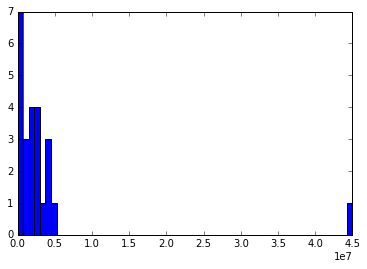

In [189]:
plt.hist(ruFilmBudget, bins=60)

In [215]:
df['budget'] = df['budget'].apply(fromStrToNum)

In [219]:
ruFilmBudget = df[df['country'] == "Россия"]

(array([ 22.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  2.00000000e+01,   4.50001800e+06,   9.00001600e+06,
          1.35000140e+07,   1.80000120e+07,   2.25000100e+07,
          2.70000080e+07,   3.15000060e+07,   3.60000040e+07,
          4.05000020e+07,   4.50000000e+07]),
 <a list of 10 Patch objects>)

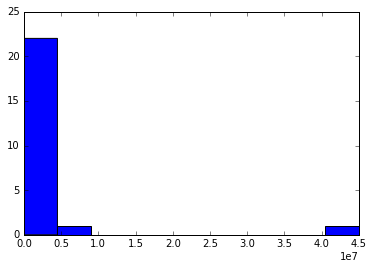

In [220]:
plt.hist(ruFilmBudget['budget'].values)

In [221]:
ruFilmBudget[ruFilmBudget['budget'] > 4000000]

,Distributors,FilmID,budget,country,distributorRelease,filmID,filmLength,genre,grossRU,grossUSA,...,ratingFilmCriticsVoteCount,ratingGoodReview,ratingGoodReviewVoteCount,ratingIMDb,ratingIMDbVoteCount,ratingMPAA,ratingVoteCount,reviewsCount,videoURL,webURL
225011,Интерсинема-Арт,225011,4500000,Россия,Союз-Видео,225011,2:30,драма,330 900,NaN,...,17,86%,54,7.7,4 626,NaN,7 932,76,http://kp.cdn.yandex.net/trailers/225011/kinop...,http://www.kinopoisk.ru/film/225011/
41010,Централ Партнершип,41010,5000000,Россия,CP-Digital,41010,1:54,"боевик, криминал",340 312,NaN,...,NaN,65.2%,12,5.6,1 242,NaN,11 458,24,http://kp.cdn.yandex.net/trailers/41010/kinopo...,http://www.kinopoisk.ru/film/41010/
481101,Централ Партнершип,481101,45000000,Россия,Монолит,481101,2:37,"драма, военный",1 521 195,NaN,...,NaN,46.7%,55,4.0,1 236,NaN,17 624,135,http://kp.cdn.yandex.net/trailers/481101/kinop...,http://www.kinopoisk.ru/film/481101/
771011,NaN,771011,4500000,Россия,NaN,771011,NaN,"мелодрама, комедия",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.kinopoisk.ru/film/771011/


In [223]:
total_frame.to_csv("../totalFrame.csv")